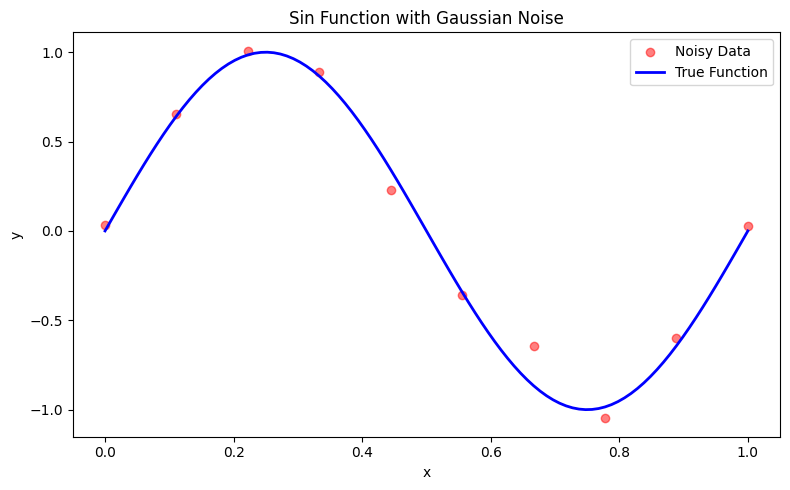

In [4]:
import torch
from torch.utils.data import Dataset
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)


class CustomDataset(Dataset):
    def __init__(self, num_samples, noise_std):
        super().__init__()
        self.x= torch.linspace(0, 1, num_samples)
        self.t_true = torch.sin(2 * torch.pi * self.x)
        self.noise = torch.randn_like(self.t_true) * noise_std
        self.t = self.t_true + self.noise

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.t[idx]


def visualize_dataset(dataset):
    x = np.linspace(0, 1, 100)
    t = np.sin(2 * np.pi * x)
    plt.figure(figsize=(8, 5))
    plt.scatter(dataset.x.numpy(), dataset.t.numpy(), label='Noisy Data', color='red', alpha=0.5)
    plt.plot(x, t, label='True Function', color='blue', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sin Function with Gaussian Noise')
    plt.legend()
    plt.tight_layout()
    plt.show()


training_data1 = CustomDataset(num_samples=10, noise_std=0.1)
visualize_dataset(training_data1)

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class PolynomialModel(nn.Module):
    def __init__(self, order):
        super().__init__()
        self.order = order
        self.coefficients = nn.Parameter(torch.randn(order + 1, 1))

    def forward(self, x):
        y = torch.stack([self.coefficients[i] * torch.pow(x, i) for i in range(self.order + 1)],axis=0).sum(axis=0)
        return y

# hyperparameters
num_epochs = 5000
learning_rate = 0.05
polynomial_order = 5

model = PolynomialModel(order=polynomial_order)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = nn.MSELoss(reduction='sum')

# train
for i in range(num_epochs):
    x = training_data1.x
    t = training_data1.t
    
    # Compute prediction and loss
    pred = model(x)
    loss = loss_func(pred, t)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1) % 200 == 0:
        print(f'Epoch [{i+1}/{num_epochs}], Loss: {loss.item()}')


Using cpu device
Epoch [200/5000], Loss: 1.3246421813964844
Epoch [400/5000], Loss: 1.0074983835220337
Epoch [600/5000], Loss: 0.7900248765945435
Epoch [800/5000], Loss: 0.6405887603759766
Epoch [1000/5000], Loss: 0.5377095937728882
Epoch [1200/5000], Loss: 0.46669045090675354
Epoch [1400/5000], Loss: 0.4174746572971344
Epoch [1600/5000], Loss: 0.3831828534603119
Epoch [1800/5000], Loss: 0.35910600423812866
Epoch [2000/5000], Loss: 0.34202492237091064
Epoch [2200/5000], Loss: 0.3297343850135803
Epoch [2400/5000], Loss: 0.3207266926765442
Epoch [2600/5000], Loss: 0.313970148563385
Epoch [2800/5000], Loss: 0.3087599277496338
Epoch [3000/5000], Loss: 0.3046109080314636
Epoch [3200/5000], Loss: 0.3011928200721741
Epoch [3400/5000], Loss: 0.29828140139579773
Epoch [3600/5000], Loss: 0.2957197427749634
Epoch [3800/5000], Loss: 0.29340261220932007
Epoch [4000/5000], Loss: 0.2912576496601105
Epoch [4200/5000], Loss: 0.289235383272171
Epoch [4400/5000], Loss: 0.28730061650276184
Epoch [4600/500

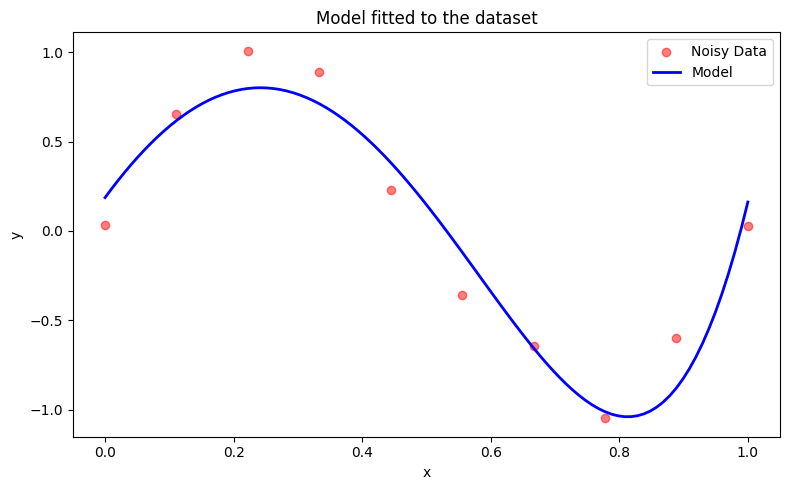

In [6]:
def visualize_testresult(dataset, model):
    with torch.no_grad():
        x = torch.linspace(0, 1, 100)
        t = model(x)
    plt.figure(figsize=(8, 5))
    plt.scatter(dataset.x.numpy(), dataset.t.numpy(), label='Noisy Data', color='red', alpha=0.5)
    plt.plot(x.numpy(), t.numpy(), label='Model', color='blue', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model fitted to the dataset')
    plt.legend()
    plt.tight_layout()
    plt.show()

    
visualize_testresult(training_data1, model)